# Analysis of renewable energy adoption and development indicators

My goal here is to explore the relationship between economic development indicators and the % renewable energy adoption.
To start with, let's import the modules I need and the datasets. Then I'll try and understand the data a bit better:
- descriptive statistics
- distribution of values across continents
- correlation matrix
- regression plots for interesting data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

Africa_data = pd.read_csv('Cleaned_joined_data/Africa_data.csv')
del Africa_data[Africa_data.columns[0]]
Asia_data = pd.read_csv('Cleaned_joined_data/Asia_data.csv')
del Asia_data[Asia_data.columns[0]]
Europe_data = pd.read_csv('Cleaned_joined_data/Europe_data.csv')
del Europe_data[Europe_data.columns[0]]
North_America_data = pd.read_csv('Cleaned_joined_data/North_America_data.csv')
del North_America_data[North_America_data.columns[0]]
Oceania_data = pd.read_csv('Cleaned_joined_data/Oceania_data.csv')
del Oceania_data[Oceania_data.columns[0]]
South_America_data = pd.read_csv('Cleaned_joined_data/South_America_data.csv')
del South_America_data[South_America_data.columns[0]]
Africa_data.loc[20:52]


,Entity,CountryCode,Year,"Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),"Death rate, crude (per 1,000 people)",Exports of goods and services (current US$),GDP per capita (current US$),GNI (current US$),"Life expectancy at birth, total (years)",Merchandise exports (current US$),Merchandise imports (current US$),Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Rural population (% of total population),Urban population,Urban population (% of total),Renewables (% equivalent primary energy),Continent
20,Algeria,DZA,1985,38.170,3.225498,7.754,1.366403e+10,2567.495521,5.636730e+10,64.073756,1.284100e+10,9.841000e+09,0.000000,57.2,52.032,10824415.0,47.968,0.728265,Africa
21,Algeria,DZA,1986,37.030,3.281974,7.318,8.188005e+09,2740.654170,6.226630e+10,64.857195,7.832000e+09,9.228000e+09,0.000000,50.9,51.140,11355687.0,48.860,0.266404,Africa
22,Algeria,DZA,1987,35.857,3.517074,6.972,9.525773e+09,2790.474907,6.521227e+10,65.487146,8.225000e+09,7.042000e+09,0.000000,46.3,50.278,11892453.0,49.722,0.517427,Africa
23,Algeria,DZA,1988,34.651,3.413726,6.695,9.163454e+09,2402.825462,5.707899e+10,65.989439,7.810000e+09,7.690000e+09,0.000000,43.1,49.489,12421409.0,50.511,0.177174,Africa
24,Algeria,DZA,1989,33.415,3.169213,6.479,1.036930e+10,2202.558118,5.374149e+10,66.382049,9.570000e+09,9.470000e+09,0.000000,41.0,48.702,12956680.0,51.298,0.224958,Africa
25,Algeria,DZA,1990,32.132,3.045837,6.307,1.454566e+10,2394.420608,5.995510e+10,66.694585,1.293000e+10,9.780000e+09,0.001791,39.7,47.915,13496455.0,52.085,0.126739,Africa
26,Algeria,DZA,1991,30.778,3.058655,6.164,1.331132e+10,1721.582067,4.349537e+10,66.958732,1.257000e+10,7.770000e+09,0.017777,38.8,47.129,14039512.0,52.871,0.277607,Africa
27,Algeria,DZA,1992,29.351,3.014447,6.037,1.215424e+10,1766.065919,4.584330e+10,67.209683,1.113000e+10,8.550000e+09,0.017363,38.1,46.343,14584467.0,53.657,0.183757,Africa
28,Algeria,DZA,1993,27.870,2.961739,5.915,1.088027e+10,1797.541804,4.819646e+10,67.475488,1.023000e+10,8.785000e+09,0.016979,37.5,45.561,15126408.0,54.439,0.350280,Africa
29,Algeria,DZA,1994,26.371,3.049884,5.790,9.585150e+09,1499.984092,4.080774e+10,67.775537,8.880000e+09,9.370000e+09,0.004688,36.9,44.781,15661221.0,55.219,0.162579,Africa


## Descriptive Statistics

In [315]:
#Lets get the summary statistics
Af_Asia_data = pd.concat([Africa_data,Asia_data])
Af_Asia_NA_data = pd.concat([Af_Asia_data,North_America_data])
Af_Asia_NA_SA_data = pd.concat([Af_Asia_NA_data,South_America_data])
Af_Asia_NA_SA_EU_data = pd.concat([Af_Asia_NA_SA_data,Europe_data])
All_countries_data = pd.concat([Af_Asia_NA_SA_EU_data,Oceania_data])

All_countries_data.describe()

,Year,"Birth rate, crude (per 1,000 people)",CO2 emissions (metric tons per capita),"Death rate, crude (per 1,000 people)",Exports of goods and services (current US$),GDP per capita (current US$),GNI (current US$),"Life expectancy at birth, total (years)",Merchandise exports (current US$),Merchandise imports (current US$),Mobile cellular subscriptions (per 100 people),"Mortality rate, infant (per 1,000 live births)",Rural population (% of total population),Urban population,Urban population (% of total),Renewables (% equivalent primary energy)
count,3283.000000,3145.000000,2905.000000,3145.000000,2.916000e+03,2974.000000,2.894000e+03,3144.000000,3.094000e+03,3.094000e+03,2691.000000,3226.000000,3214.000000,3.211000e+03,3214.000000,3283.000000
mean,1991.088943,20.668507,8.234901,8.730674,9.463332e+10,12231.315245,4.127129e+11,70.715383,7.385478e+10,7.571212e+10,33.768475,28.859764,36.749634,2.848082e+07,63.250366,10.745226
std,14.554339,10.133180,9.977765,2.987187,2.141683e+11,16304.908737,1.329357e+12,7.077509,1.777517e+11,1.961221e+11,48.445054,31.081018,21.544778,6.327574e+07,21.544778,14.447473
min,1965.000000,7.600000,0.041070,1.479000,3.617755e+07,56.472354,6.327997e+07,44.353512,1.680000e+06,8.960000e+06,0.000000,1.500000,0.000000,6.402200e+04,7.901000,0.000000
25%,1979.000000,12.500000,2.366235,6.670000,5.706869e+09,1488.560844,2.016534e+10,67.340433,3.838368e+09,4.286782e+09,0.000000,7.500000,21.242250,3.391228e+06,50.636250,0.620705
50%,1992.000000,17.700000,6.217958,8.600000,2.141259e+10,5097.498057,7.074471e+10,71.730866,1.437150e+10,1.547100e+10,1.420044,16.400000,32.600000,8.758554e+06,67.400000,4.862272
75%,2004.000000,26.600000,9.810842,10.400000,8.156135e+10,17128.325797,2.436846e+11,75.600659,5.951018e+10,5.859725e+10,72.050709,39.675000,49.363750,2.577200e+07,78.757750,15.615127
max,2015.000000,50.003000,99.840439,19.739000,2.342087e+12,116664.262488,1.781270e+13,83.331951,2.342747e+12,2.409385e+12,218.430285,197.600000,92.099000,7.422993e+08,100.000000,83.540470


In [316]:
#Specify colour palette - I can use these palettes for subsequent plots to keep everything looking nice
colours = ['#025E73', '#9AD9CD', '#6DA96D', '#F2B749', '#F2522f']
custom_palette = sns.color_palette(colours)
custom_palette


[(0.00784313725490196, 0.3686274509803922, 0.45098039215686275),
 (0.6039215686274509, 0.8509803921568627, 0.803921568627451),
 (0.42745098039215684, 0.6627450980392157, 0.42745098039215684),
 (0.9490196078431372, 0.7176470588235294, 0.28627450980392155),
 (0.9490196078431372, 0.3215686274509804, 0.1843137254901961)]

/var/folders/t6/qtsx2vt97b73__jhqfxxbdnw0000gn/T/ipykernel_87284/715303663.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


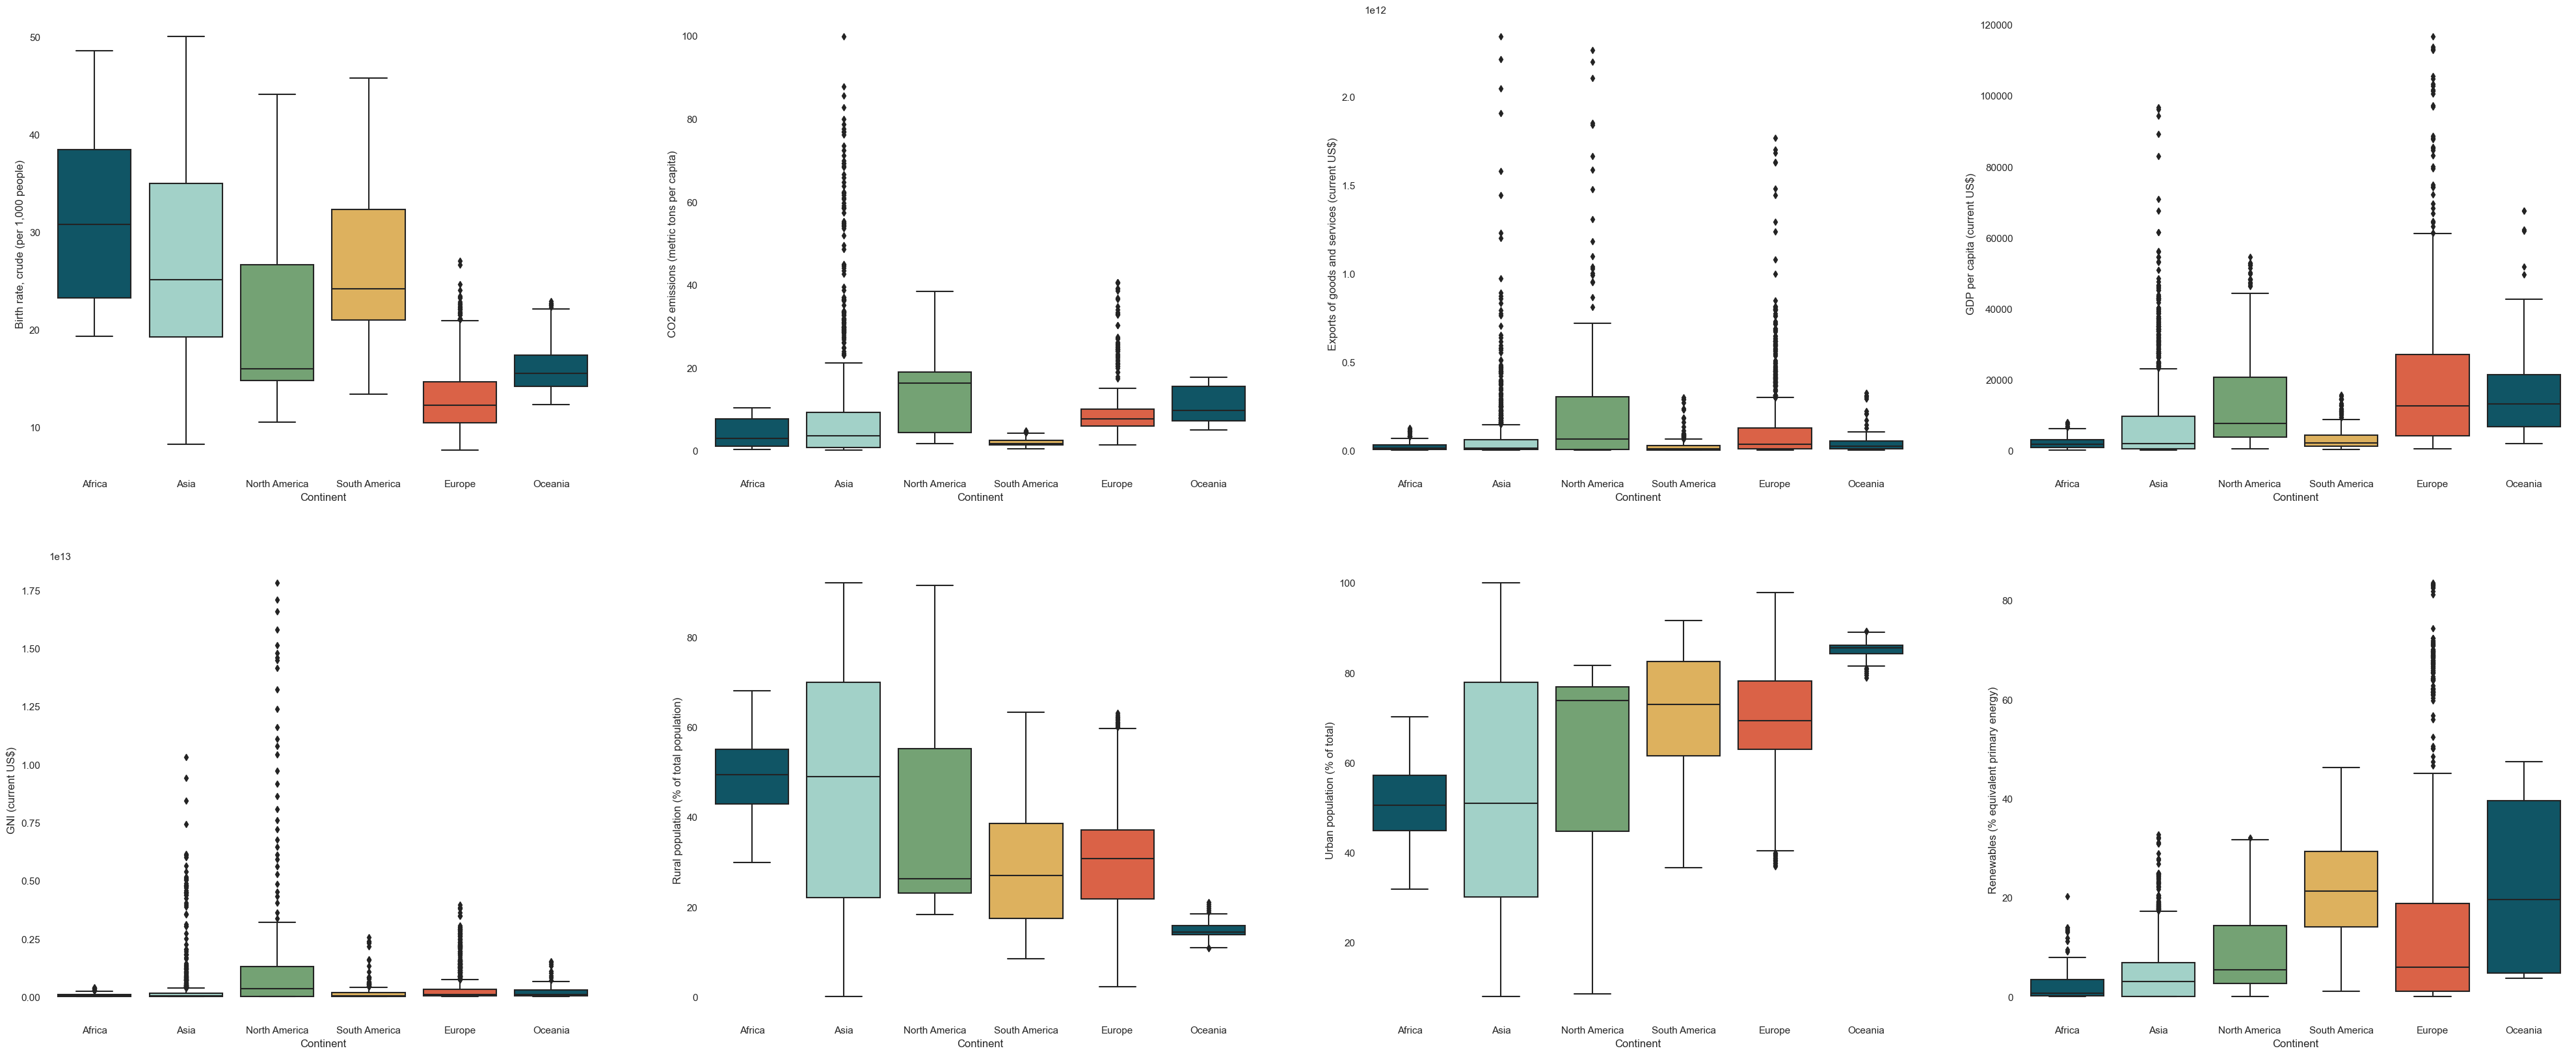

In [317]:
# specify colour palette

#Okay now I'll use box plots to show distribution of some of the indicators im most interested in by continent.
fig, ax =plt.subplots(2,4, figsize=(50,20))
Crude_birth_rate = sns.boxplot(palette=custom_palette,data=All_countries_data, x='Continent', y='Birth rate, crude (per 1,000 people)',ax=ax[0,0])
CO2_emissions = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='CO2 emissions (metric tons per capita)',ax=ax[0,1])
Exports = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='Exports of goods and services (current US$)',ax=ax[0,2])
GDP_per_cap = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='GDP per capita (current US$)',ax=ax[0,3])
GNI = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='GNI (current US$)',ax=ax[1,0])
Rural_pop = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='Rural population (% of total population)',ax=ax[1,1])
Urban_pop = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='Urban population (% of total)',ax=ax[1,2])
Renewable_share = sns.boxplot(palette= custom_palette, data=All_countries_data, x='Continent', y='Renewables (% equivalent primary energy)',ax=ax[1,3])
fig.show()

I made this dataframe (below) then realised I don't need it but I'm not deleting it because I wrote the code completely independetly.

In [318]:

# get the averages for each column in each continent and add to a list
africa_indicators = []
for column in Africa_data:
    if Africa_data[column].dtype == 'float':
        average_indicator = Africa_data[column].mean()
        africa_indicators.append(average_indicator)

asia_indicators = []
for column in Asia_data:
    if Asia_data[column].dtype == 'float':
        average_indicator = Asia_data[column].mean()
        asia_indicators.append(average_indicator)

europe_indicators = []
for column in Europe_data:
    if Europe_data[column].dtype == 'float':
        average_indicator = Europe_data[column].mean()
        europe_indicators.append(average_indicator)

north_america_indicators = []
for column in North_America_data:
    if North_America_data[column].dtype == 'float':
        average_indicator = North_America_data[column].mean()
        north_america_indicators.append(average_indicator)

south_america_indicators = []
for column in South_America_data:
    if South_America_data[column].dtype == 'float':
        average_indicator = South_America_data[column].mean()
        south_america_indicators.append(average_indicator)

oceania_indicators = []
for column in Oceania_data:
    if Oceania_data[column].dtype == 'float':
        average_indicator = Oceania_data[column].mean()
        oceania_indicators.append(average_indicator)

#add values to start of each list for entity etc.
africa_indicators.insert(0,'Africa')
asia_indicators.insert(0, 'Asia')
europe_indicators.insert(0, 'Europe')
north_america_indicators.insert(0, 'North America')
south_america_indicators.insert(0, 'South America')
oceania_indicators.insert(0, 'Oceania')


#convert lists to pandas series
africa_indicators_row = pd.Series(africa_indicators)
asia_indicators_row = pd.Series(asia_indicators)
europe_indicators_row = pd.Series(europe_indicators)
north_america_indicators_row = pd.Series(north_america_indicators)
south_america_indicators_row = pd.Series(south_america_indicators)
oceania_indicators_row = pd.Series(oceania_indicators)

# append the pandas series to the dataframe and add the column names
cont_averages = pd.DataFrame([africa_indicators_row,asia_indicators_row, europe_indicators_row, north_america_indicators_row, south_america_indicators_row, oceania_indicators_row])
cont_averages.columns = ['Entity','Average Birth rate, crude (per 1,000 people)','Average CO2 emissions (metric tons per capita)',
                         'Average Death rate, crude (per 1,000 people)','Average Exports of goods and services (current US$)',
                         'Average GDP per capita (current US$)','Average GNI (current US$)','Average Life expectancy at birth, total (years)',
                         'Average Merchandise exports (current US$)','Average Merchandise imports (current US$)','Average Mobile cellular subscriptions (per 100 people)',
                         'Average Mortality rate, infant (per 1,000 live births)','Average Rural population (% of total population)','Average Urban population',
                         'Average Urban population (% of total)','Average Renewables (% equivalent primary energy)']
cont_averages.head(6)


,Entity,"Average Birth rate, crude (per 1,000 people)",Average CO2 emissions (metric tons per capita),"Average Death rate, crude (per 1,000 people)",Average Exports of goods and services (current US$),Average GDP per capita (current US$),Average GNI (current US$),"Average Life expectancy at birth, total (years)",Average Merchandise exports (current US$),Average Merchandise imports (current US$),Average Mobile cellular subscriptions (per 100 people),"Average Mortality rate, infant (per 1,000 live births)",Average Rural population (% of total population),Average Urban population,Average Urban population (% of total),Average Renewables (% equivalent primary energy)
0,Africa,31.596327,4.012855,10.019844,2.326224e+10,2217.101886,7.596392e+10,60.770208,1.907534e+10,1.974282e+10,24.593795,64.825000,49.252053,1.510831e+07,50.747947,2.392176
1,Asia,26.872043,8.849169,7.279495,7.649425e+10,8192.021863,3.120064e+11,67.733010,6.220343e+10,5.524286e+10,28.913741,43.204257,45.880485,4.077642e+07,54.119515,4.973429
2,Europe,12.896938,8.537504,10.398545,1.143392e+11,18926.566670,3.450053e+11,74.555817,8.675246e+10,8.715118e+10,41.541905,11.618821,29.886350,1.347001e+07,70.113650,13.437728
3,North America,20.420607,14.060991,7.549418,2.514209e+11,14160.127863,2.005642e+12,72.177563,1.981774e+11,2.649476e+11,27.365066,23.086765,41.566580,6.920514e+07,58.433420,10.085119
4,South America,26.421908,2.056556,7.682116,2.547866e+10,3274.082474,1.724075e+11,67.879004,2.183285e+10,1.999531e+10,25.765238,42.984768,28.929513,3.202761e+07,71.070487,22.261170
5,Oceania,16.204592,10.880643,7.540102,4.909181e+10,17005.882332,2.342779e+11,76.041901,3.779034e+10,3.982097e+10,35.030570,9.567647,14.762050,8.839201e+06,85.237950,22.246492


Lets do a ridgeline plot, this shows distribution in a similar way to the boxplots above but it is a much more aesthetic visual. Lets do the first one manually, as an example

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


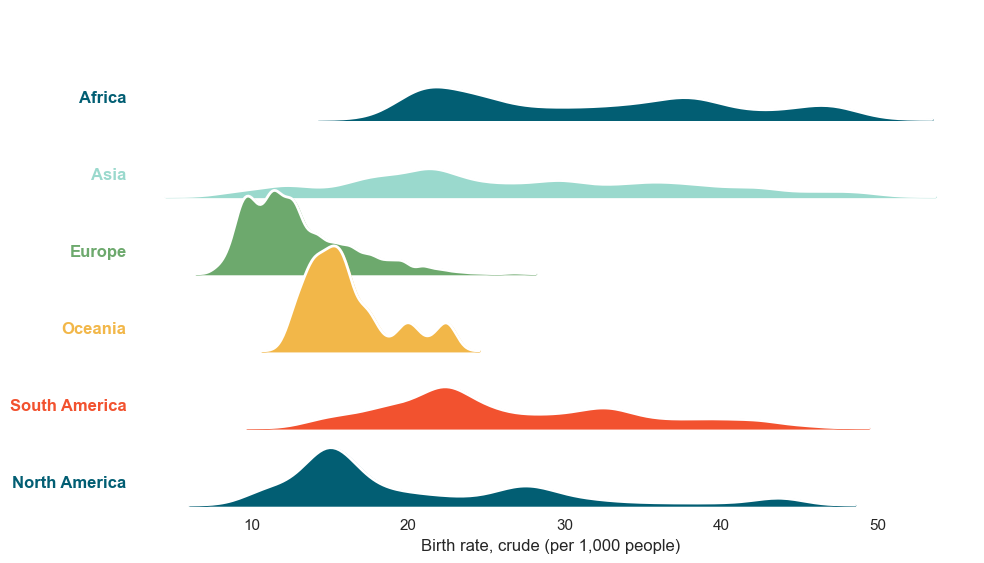

In [319]:
#make new df for all countries
all_countries_data = pd.concat([Africa_data, Asia_data,Europe_data,Oceania_data,South_America_data,North_America_data], ignore_index=True)
# create facet grid object for our plots to sit on
grid = sns.FacetGrid(all_countries_data, row='Continent', hue='Continent', aspect=10, height=1, palette=custom_palette)
# create first plots, this is the fill part
grid.map(sns.kdeplot, "Birth rate, crude (per 1,000 people)",bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
# create second plot, this is a white line around the edge which makes it look loooads nicer.
grid.map(sns.kdeplot, "Birth rate, crude (per 1,000 people)", clip_on=False, color="w", lw=2, bw_adjust=.5)

#this label function will clean up the left hand side
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)
#call the function, with continent
grid.map(label, 'Continent')

# can make the plots sit on top of each other, which is where the white line shines
grid.figure.subplots_adjust(hspace=-0.3)
#remove the titles
grid.set_titles("")
# remove the ticks (that shit on the y axis)
grid.set(yticks=[], ylabel="")
# set x axis title
grid.set(xlabel='Birth rate, crude (per 1,000 people)')
grid.despine(bottom=True, left=True)


That looks spiffying. I'm gonna define a function to do the rest.

In [320]:

def ridge_plot(region, column,spacing, palette ):
   
    # create facet grid object for our plots to sit on
    grid = sns.FacetGrid(all_countries_data, row=region, hue=region, aspect=10, height=1, palette=palette)
    # create first plots, this is the fill part
    grid.map(sns.kdeplot, column, bw_adjust=0.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
    # create second plot, this is a white line around the edge which makes it look loooads nicer.
    grid.map(sns.kdeplot, column, clip_on=False, color="w", lw=2, bw_adjust=.5)

    #this label function will clean up the left hand side
    def label(x, color, label):
        ax = plt.gca()
        ax.text(0, .2, label, fontweight="bold", color=color,
                ha="right", va="center", transform=ax.transAxes)
    #call the function, with continent
    grid.map(label, region)

    # can make the plots sit on top of each other, which is where the white line shines
    grid.figure.subplots_adjust(hspace=spacing)
    #remove the titles
    grid.set_titles("")
    # remove the ticks (that shit on the y axis)
    grid.set(yticks=[], ylabel="")
    # set x axis title
    grid.set(xlabel=column)
    grid.despine(bottom=True, left=True)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


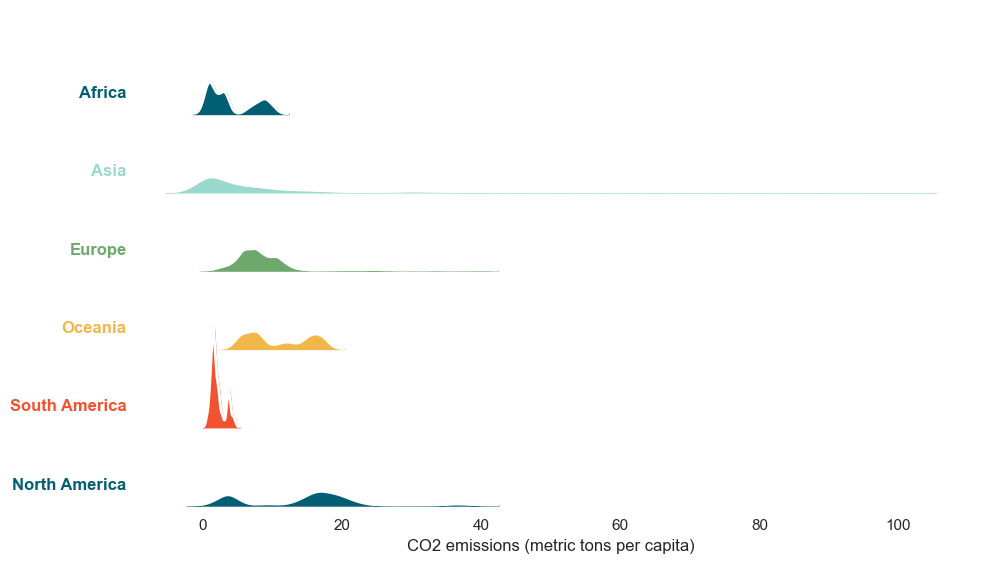

In [321]:
ridge_plot('Continent', 'CO2 emissions (metric tons per capita)', -0.25, custom_palette)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


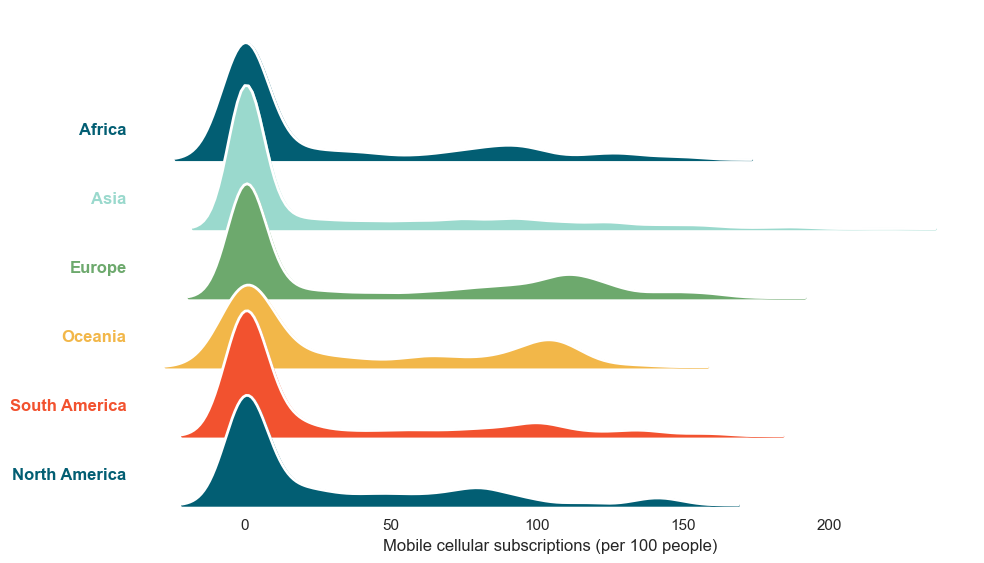

In [322]:

ridge_plot('Continent', 'Mobile cellular subscriptions (per 100 people)', -0.54, custom_palette)

An interesting takeaway from the above graph is that mobile phone subscriptions are mainly around 1 per person. In order to get more meaningful results, I should normalise the data.

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


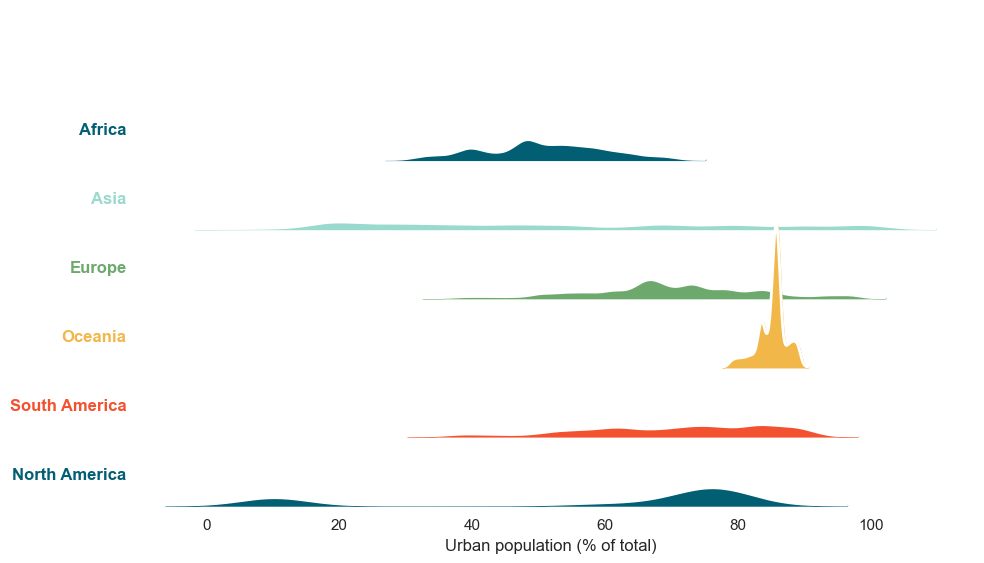

In [323]:
ridge_plot('Continent', 'Urban population (% of total)', -0.54, custom_palette)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


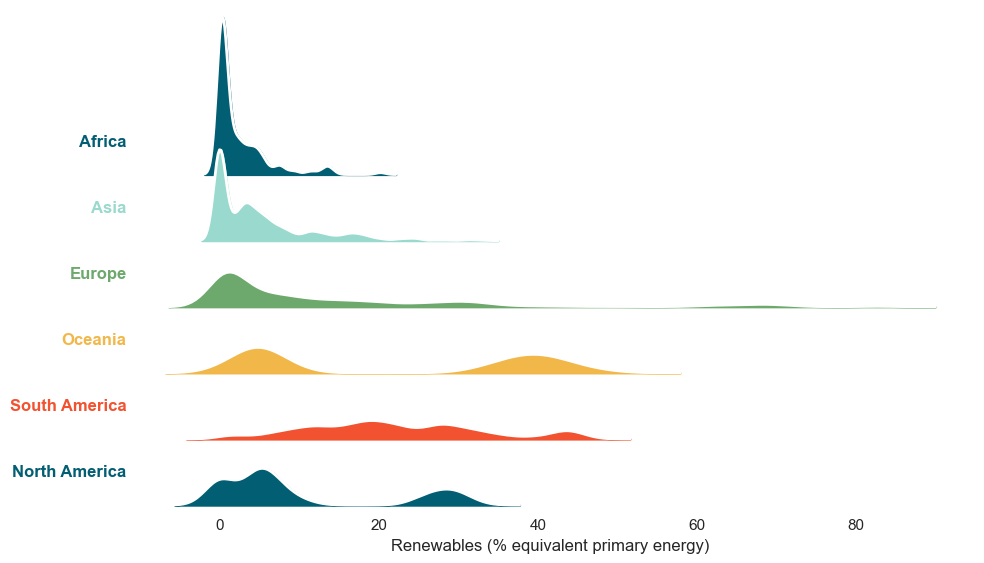

In [324]:

ridge_plot('Continent', 'Renewables (% equivalent primary energy)', -0.6, custom_palette)

Finally for our distribution plots, lets make a histogram to show the top 3 countries for renewable energy share in each continent. We will do this for the most recent year in the dataset (2015). I want to show this as a column chart with the continents grouped together. 

Process for building this chart:
- get 2015 data for each continent
- get 3 highest for each continent 2015
- store all of these in a dataframe
- make the chart

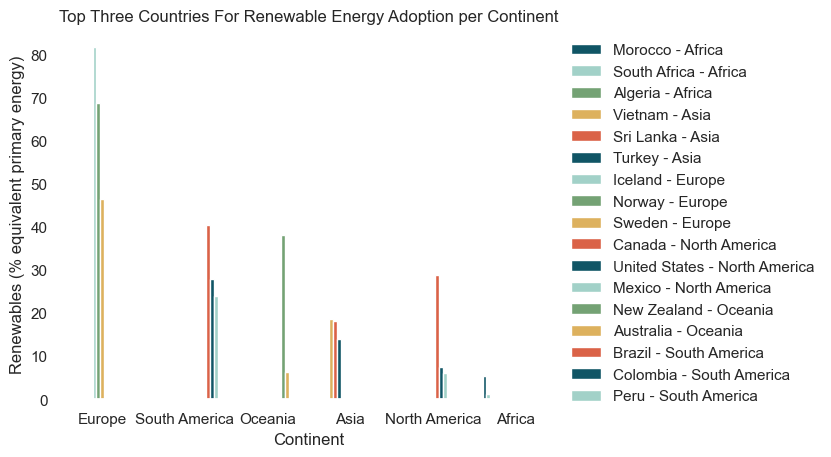

In [394]:
#get data from 2015
all_countries_data_2015 = all_countries_data.loc[all_countries_data['Year'] == 2015]

# Sort the DataFrame by continent and renewable share in descending order
sorted_data = all_countries_data_2015.sort_values(by=['Continent', 'Renewables (% equivalent primary energy)'], ascending=[True, False])

# Group the sorted data by continent
grouped = sorted_data.groupby('Continent')

# Create an empty list to store DataFrames for each continent's top 3 countries
top_countries_per_continent = []

# Iterate through each group (continent) and select the top 3 countries
for continent, group_data in grouped:
    top_countries_per_continent.append(group_data.nlargest(3, 'Renewables (% equivalent primary energy)'))

# Concatenate the DataFrames from the list into a single DataFrame
final_top_countries = pd.concat(top_countries_per_continent)


# Sort the DataFrame by continent and renewable share in descending order
sorted_data = all_countries_data_2015.sort_values(by=['Continent', 'Renewables (% equivalent primary energy)'], ascending=[True, False])

# Group the sorted data by continent
grouped = sorted_data.groupby('Continent')

# Create an empty list to store DataFrames for each continent's top 3 countries
top_countries_per_continent = []

# Iterate through each group (continent) and select the top 3 countries
for continent, group_data in grouped:
    top_countries_per_continent.append(group_data.nlargest(3, 'Renewables (% equivalent primary energy)'))

# Concatenate the DataFrames from the list into a single DataFrame
final_top_countries = pd.concat(top_countries_per_continent)

# Create a custom ordering of continents based on the average renewable share
continent_order = final_top_countries.groupby('Continent')['Renewables (% equivalent primary energy)'].mean().sort_values(ascending=False).index

# Convert the 'Continent' column to a categorical type with the custom ordering
final_top_countries['Continent'] = pd.Categorical(final_top_countries['Continent'], categories=continent_order, ordered=True)

# Create the bar plot
top3_barplot = sns.barplot(x="Continent", y="Renewables (% equivalent primary energy)", hue="Entity", data=final_top_countries, 
                           palette=custom_palette)

# Move the legend to the upper left corner
sns.move_legend(top3_barplot, "upper left", bbox_to_anchor=(1, 1), ncol=1, frameon=False)

# Create a custom legend label format
def custom_legend_label(row):
    return f"{row['Entity']} - {row['Continent']}"

# Get the handles and labels of the legend
handles, labels = top3_barplot.get_legend_handles_labels()

# Modify the legend labels using the custom format
modified_labels = [custom_legend_label(final_top_countries.iloc[i]) for i in range(len(labels))]

# Update the legend labels
top3_barplot.legend(handles=handles, labels=modified_labels, loc="upper left", bbox_to_anchor=(1, 1), ncol=1, frameon=False)

# add title
top3_barplot.set(title='Top Three Countries For Renewable Energy Adoption per Continent')

# Show the plot
plt.show()

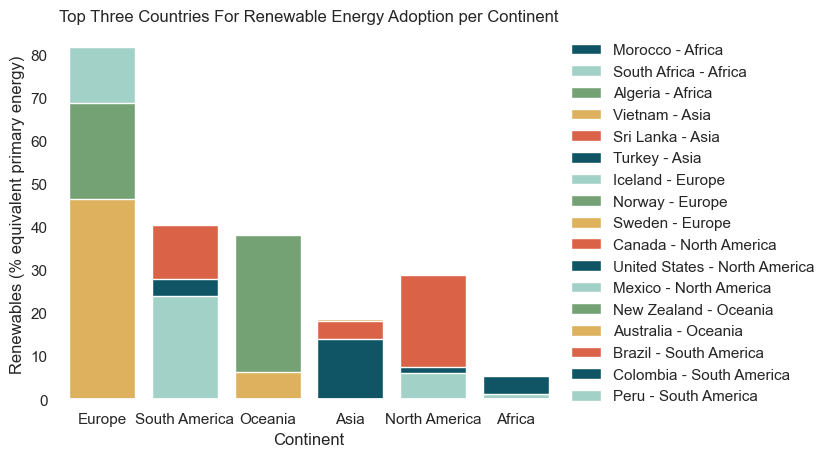

In [395]:


#get data from 2015
all_countries_data_2015 = all_countries_data.loc[all_countries_data['Year'] == 2015]

# Sort the DataFrame by continent and renewable share in descending order
sorted_data = all_countries_data_2015.sort_values(by=['Continent', 'Renewables (% equivalent primary energy)'], ascending=[True, False])

# Group the sorted data by continent
grouped = sorted_data.groupby('Continent')

# Create an empty list to store DataFrames for each continent's top 3 countries
top_countries_per_continent = []

# Iterate through each group (continent) and select the top 3 countries
for continent, group_data in grouped:
    top_countries_per_continent.append(group_data.nlargest(3, 'Renewables (% equivalent primary energy)'))

# Concatenate the DataFrames from the list into a single DataFrame
final_top_countries = pd.concat(top_countries_per_continent)


# Sort the DataFrame by continent and renewable share in descending order
sorted_data = all_countries_data_2015.sort_values(by=['Continent', 'Renewables (% equivalent primary energy)'], ascending=[True, False])

# Group the sorted data by continent
grouped = sorted_data.groupby('Continent')

# Create an empty list to store DataFrames for each continent's top 3 countries
top_countries_per_continent = []

# Iterate through each group (continent) and select the top 3 countries
for continent, group_data in grouped:
    top_countries_per_continent.append(group_data.nlargest(3, 'Renewables (% equivalent primary energy)'))

# Concatenate the DataFrames from the list into a single DataFrame
final_top_countries = pd.concat(top_countries_per_continent)

# Create a custom ordering of continents based on the average renewable share
continent_order = final_top_countries.groupby('Continent')['Renewables (% equivalent primary energy)'].mean().sort_values(ascending=False).index

# Convert the 'Continent' column to a categorical type with the custom ordering
final_top_countries['Continent'] = pd.Categorical(final_top_countries['Continent'], categories=continent_order, ordered=True)

# Create the bar plot
top3_barplot = sns.barplot(x="Continent", y="Renewables (% equivalent primary energy)", hue="Entity", data=final_top_countries, 
                           palette=custom_palette, dodge=False)

# Move the legend to the upper left corner
sns.move_legend(top3_barplot, "upper left", bbox_to_anchor=(1, 1), ncol=1, frameon=False)

# Create a custom legend label format
def custom_legend_label(row):
    return f"{row['Entity']} - {row['Continent']}"

# Get the handles and labels of the legend
handles, labels = top3_barplot.get_legend_handles_labels()

# Modify the legend labels using the custom format
modified_labels = [custom_legend_label(final_top_countries.iloc[i]) for i in range(len(labels))]

# Update the legend labels
top3_barplot.legend(handles=handles, labels=modified_labels, loc="upper left", bbox_to_anchor=(1, 1), ncol=1, frameon=False)

# add title
top3_barplot.set(title='Top Three Countries For Renewable Energy Adoption per Continent')

# Show the plot
plt.show()


## Maps

I'm going to produce world chlorpleth maps using geopandas. Lets make it really fancy by using dash to allow selection of the indicator

In [85]:
print(All_countries_data.dtypes)

Unnamed: 0                                          int64
Entity                                             object
CountryCode                                        object
Year                                                int64
Birth rate, crude (per 1,000 people)              float64
CO2 emissions (metric tons per capita)            float64
Death rate, crude (per 1,000 people)              float64
Exports of goods and services (current US$)       float64
GDP per capita (current US$)                      float64
GNI (current US$)                                 float64
Life expectancy at birth, total (years)           float64
Merchandise exports (current US$)                 float64
Merchandise imports (current US$)                 float64
Mobile cellular subscriptions (per 100 people)    float64
Mortality rate, infant (per 1,000 live births)    float64
Rural population (% of total population)          float64
Urban population                                  float64
Urban populati

<class 'geopandas.geodataframe.GeoDataFrame'>
           Entity ISO_A3                                           geometry  \
0           Aruba    ABW  POLYGON ((-69.99694 12.57758, -69.93639 12.531...   
1     Afghanistan    AFG  POLYGON ((71.04980 38.40866, 71.05714 38.40903...   
2          Angola    AGO  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...   
3        Anguilla    AIA  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...   
4         Albania    ALB  POLYGON ((19.74777 42.57890, 19.74601 42.57993...   
..            ...    ...                                                ...   
250         Samoa    WSM  MULTIPOLYGON (((-171.57002 -13.93816, -171.564...   
251         Yemen    YEM  MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...   
252  South Africa    ZAF  MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...   
253        Zambia    ZMB  POLYGON ((31.11984 -8.61663, 31.14102 -8.60619...   
254      Zimbabwe    ZWE  POLYGON ((30.01065 -15.64623, 30.05024 -15.640...   

     

<Axes: title={'center': 'CO2 emissions (metric tons per capita)'}>

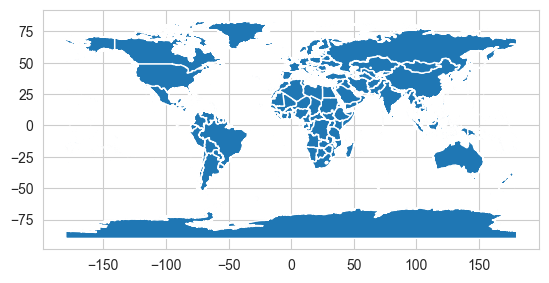

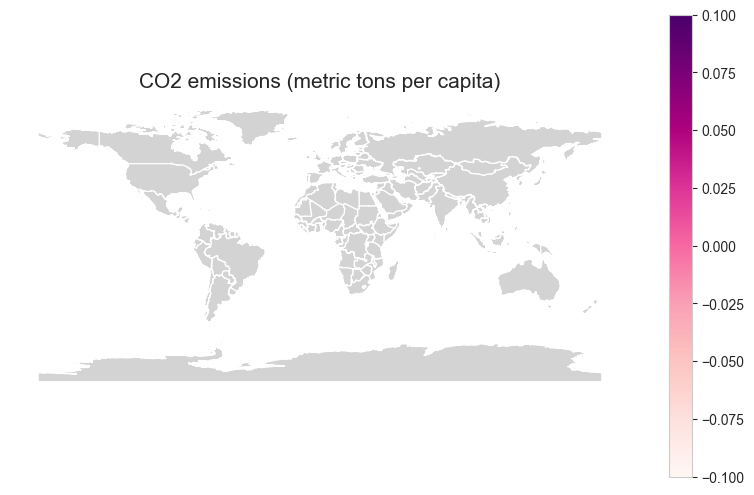

In [83]:
import xlrd
import random
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors

#Extract the indicator I want to plot
Renewable_share_for_map = All_countries_data[['Entity','CO2 emissions (metric tons per capita)', 'Year']]
Renewable_share_for_map2015 = Renewable_share_for_map.loc[Renewable_share_for_map['Year'] == 2015]

#set the style of the map using seaborn
sns.set_style('whitegrid')

#
countries_polygons = "countries.geojson"
map_df = gpd.read_file(countries_polygons)
world = map_df['ADMIN'].tolist()
print(type(map_df))
# Plot the default map
map_df.plot()

#change ADMIN column to Entity in map_df and merge the indicies data to the polygon data
map_df.rename(columns={'ADMIN': 'Entity'}, inplace=True)
merged = map_df.merge(Renewable_share_for_map2015, on='Entity', how='left')
print(merged)
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.axis('off')
ax.set_title('CO2 emissions (metric tons per capita)', fontdict={'fontsize': '15', 'fontweight' : '3'})

merged.plot(column='CO2 emissions (metric tons per capita)',
            cmap='RdPu',
            linewidth=0.9,
            ax=ax,
            edgecolor='1',
            legend=True, missing_kwds={
            "color": "lightgrey",
            "label": "Missing values",},)

## Correlation Heatmap

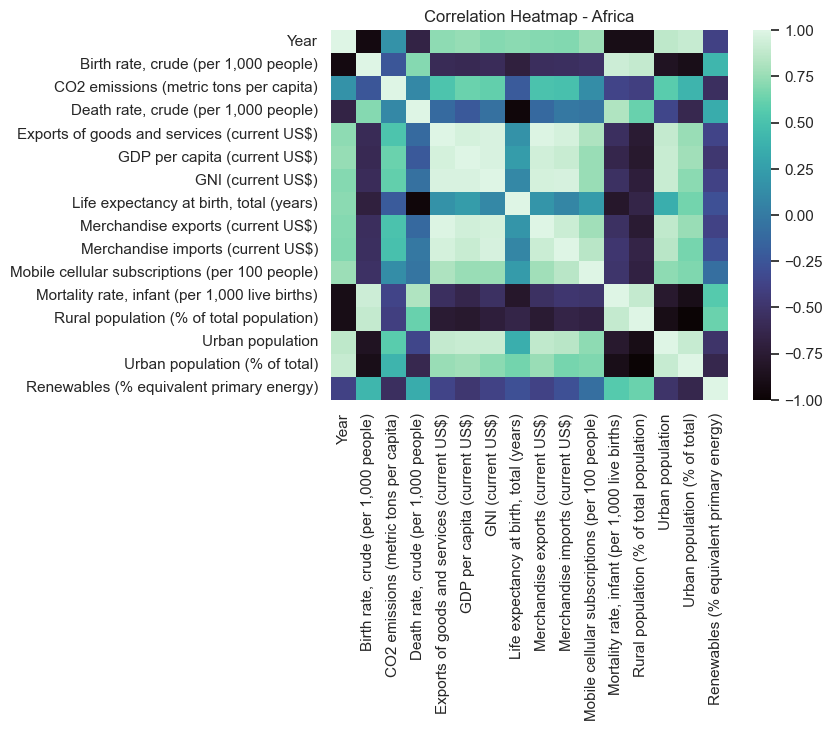

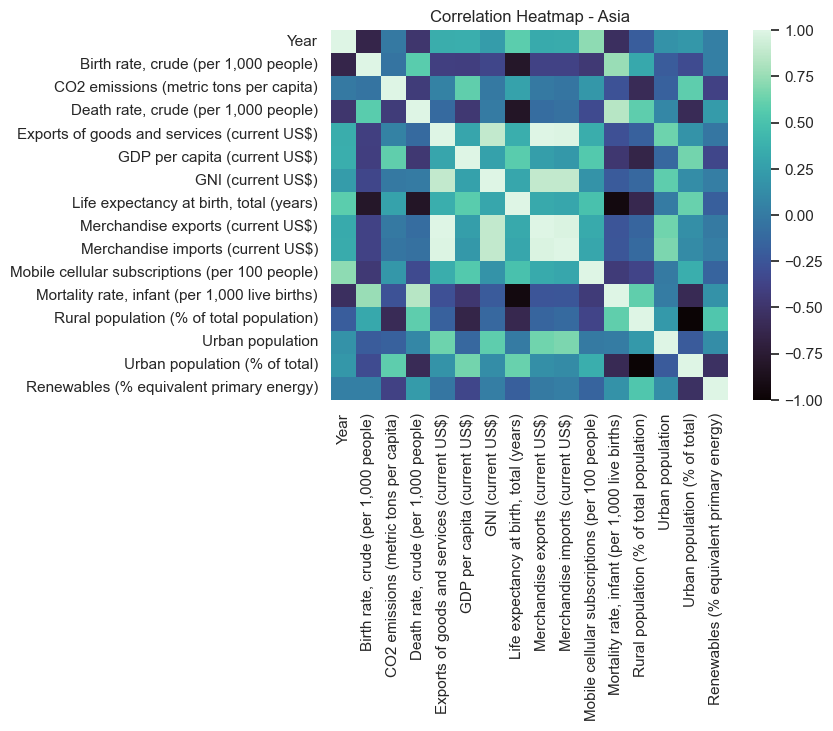

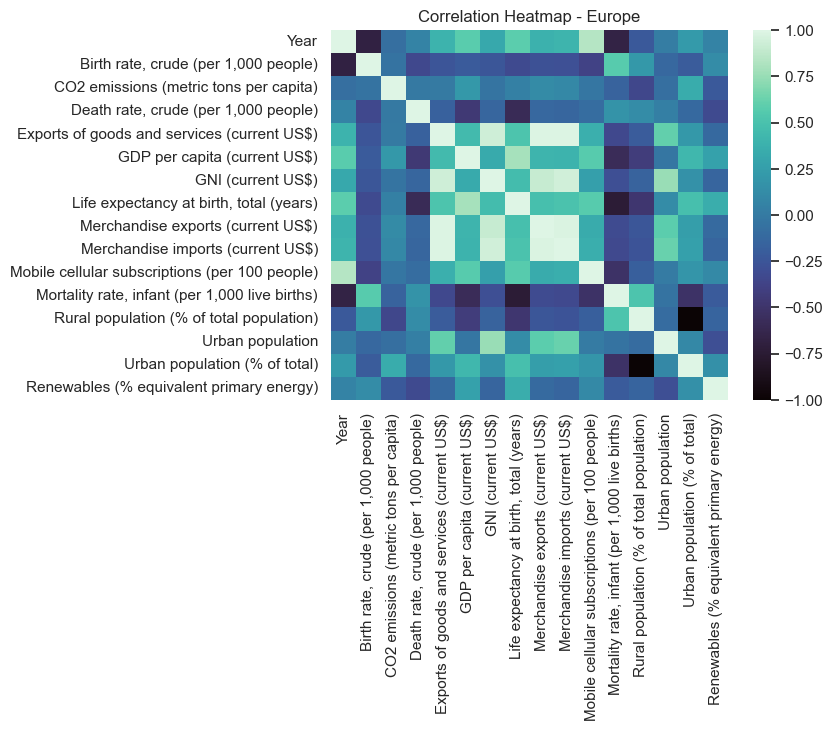

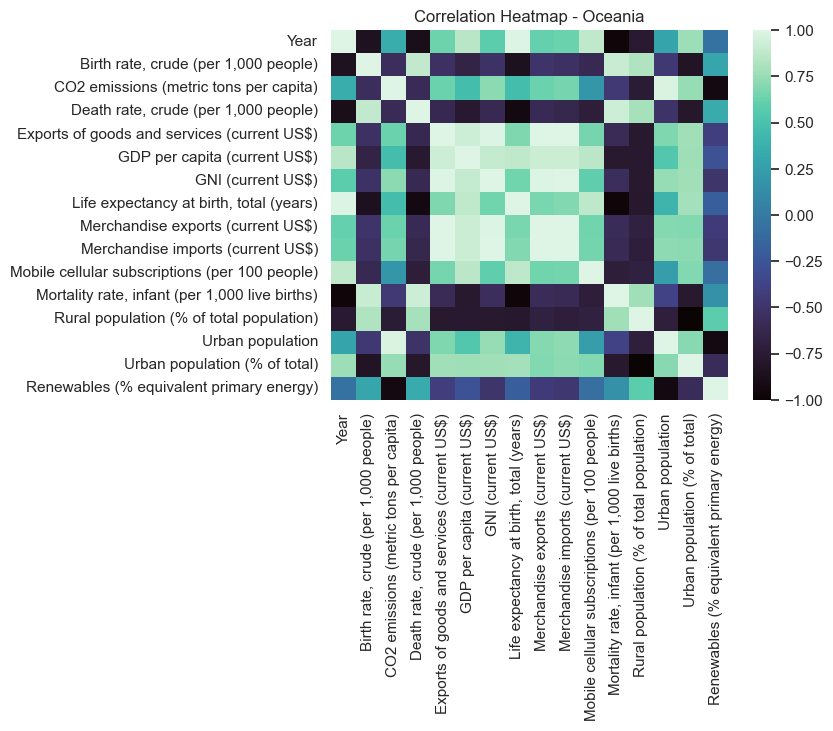

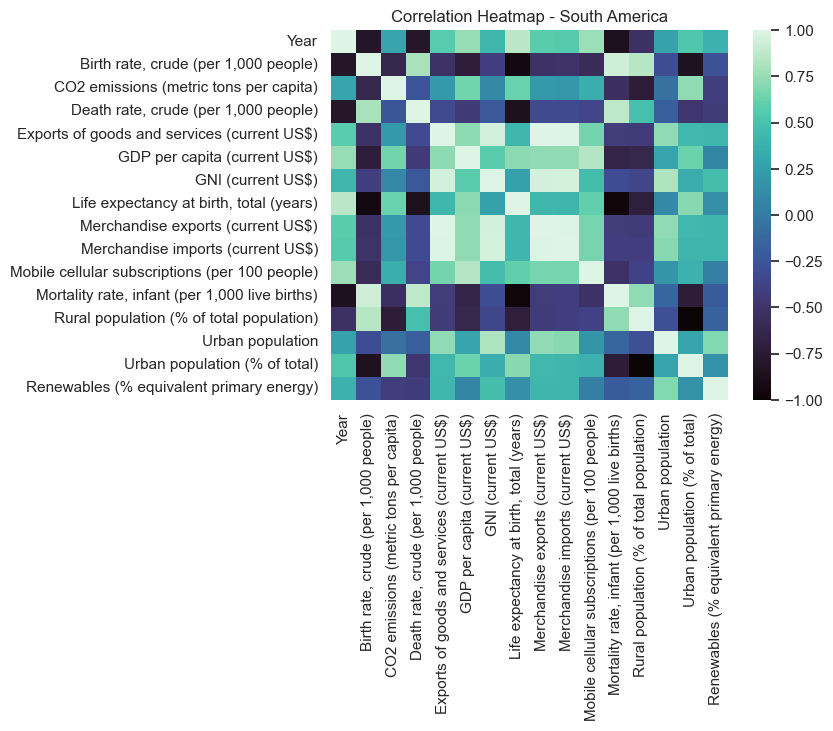

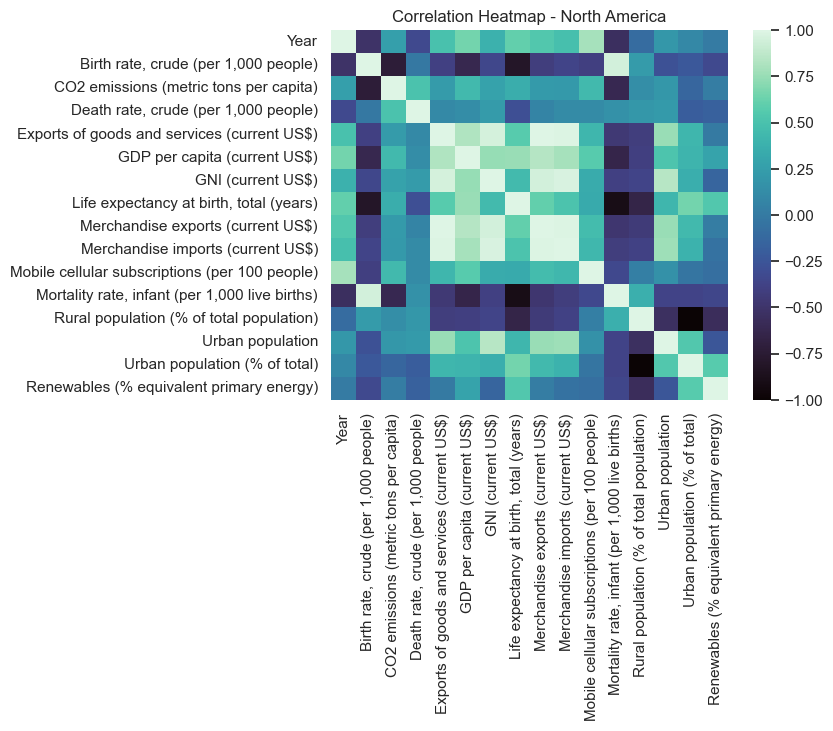

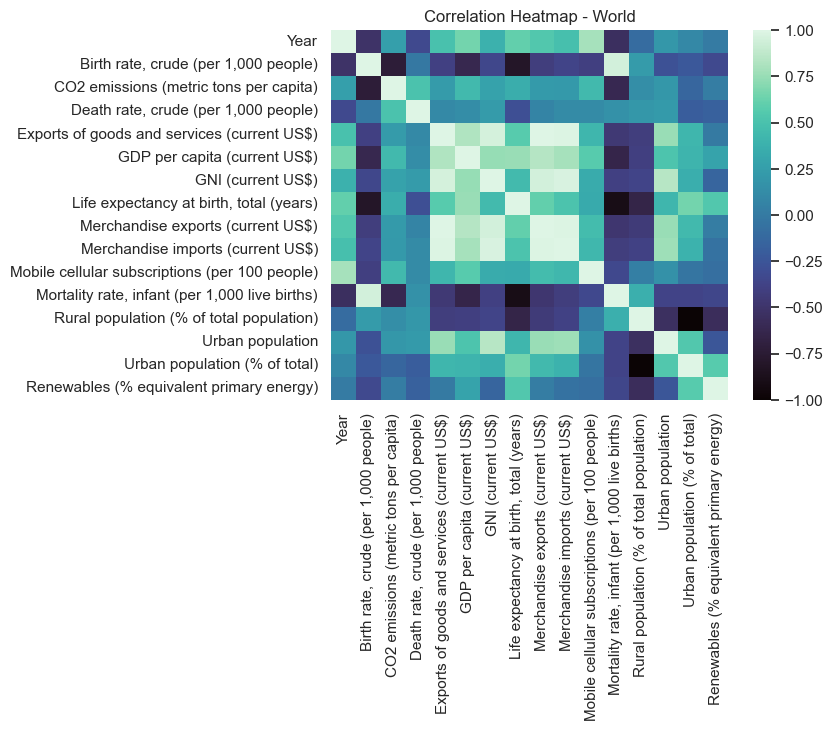

In [209]:
#for the correlation heatmaps I need to calculate the correlation coeffients between all the variables. Instead of scipy, lets do this with pandas.corr
Africa_correlation_coefficients = Africa_data.corr(method='pearson', numeric_only=True)
Asia_correlation_coefficients = Asia_data.corr(method='pearson', numeric_only=True)
Europe_correlation_coefficients = Europe_data.corr(method='pearson', numeric_only=True)
North_America_correlation_coefficients = North_America_data.corr(method='pearson', numeric_only=True)
Oceania_correlation_coefficients = Oceania_data.corr(method='pearson', numeric_only=True)
South_America_correlation_coefficients = South_America_data.corr(method='pearson', numeric_only=True)

#Now we can plot the heatmaps
sns.heatmap(Africa_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - Africa')
plt.show()
sns.heatmap(Asia_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - Asia')
plt.show()
sns.heatmap(Europe_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - Europe')
plt.show()
sns.heatmap(Oceania_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - Oceania')
plt.show()
sns.heatmap(South_America_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - South America')
plt.show()
sns.heatmap(North_America_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - North America')
plt.show()

all_countries = pd.concat([Africa_correlation_coefficients, Asia_correlation_coefficients,Europe_correlation_coefficients,Oceania_correlation_coefficients,South_America_correlation_coefficients,North_America_correlation_coefficients], ignore_index=True)
sns.heatmap(North_America_correlation_coefficients, annot= False, cmap='mako')
plt.title('Correlation Heatmap - World')
plt.show()

## Regression

I'm not going to get into the machine learning stuff in this project, so I'm not going to make any regression models or anything, but it would be nice to show how the most correlated inidcators change with each other.

- renewables vs urban population (south america)
- renewables vs life expectancy at birth (world)
- renewables vs CO2 emsissions
- renewables vs birth rate

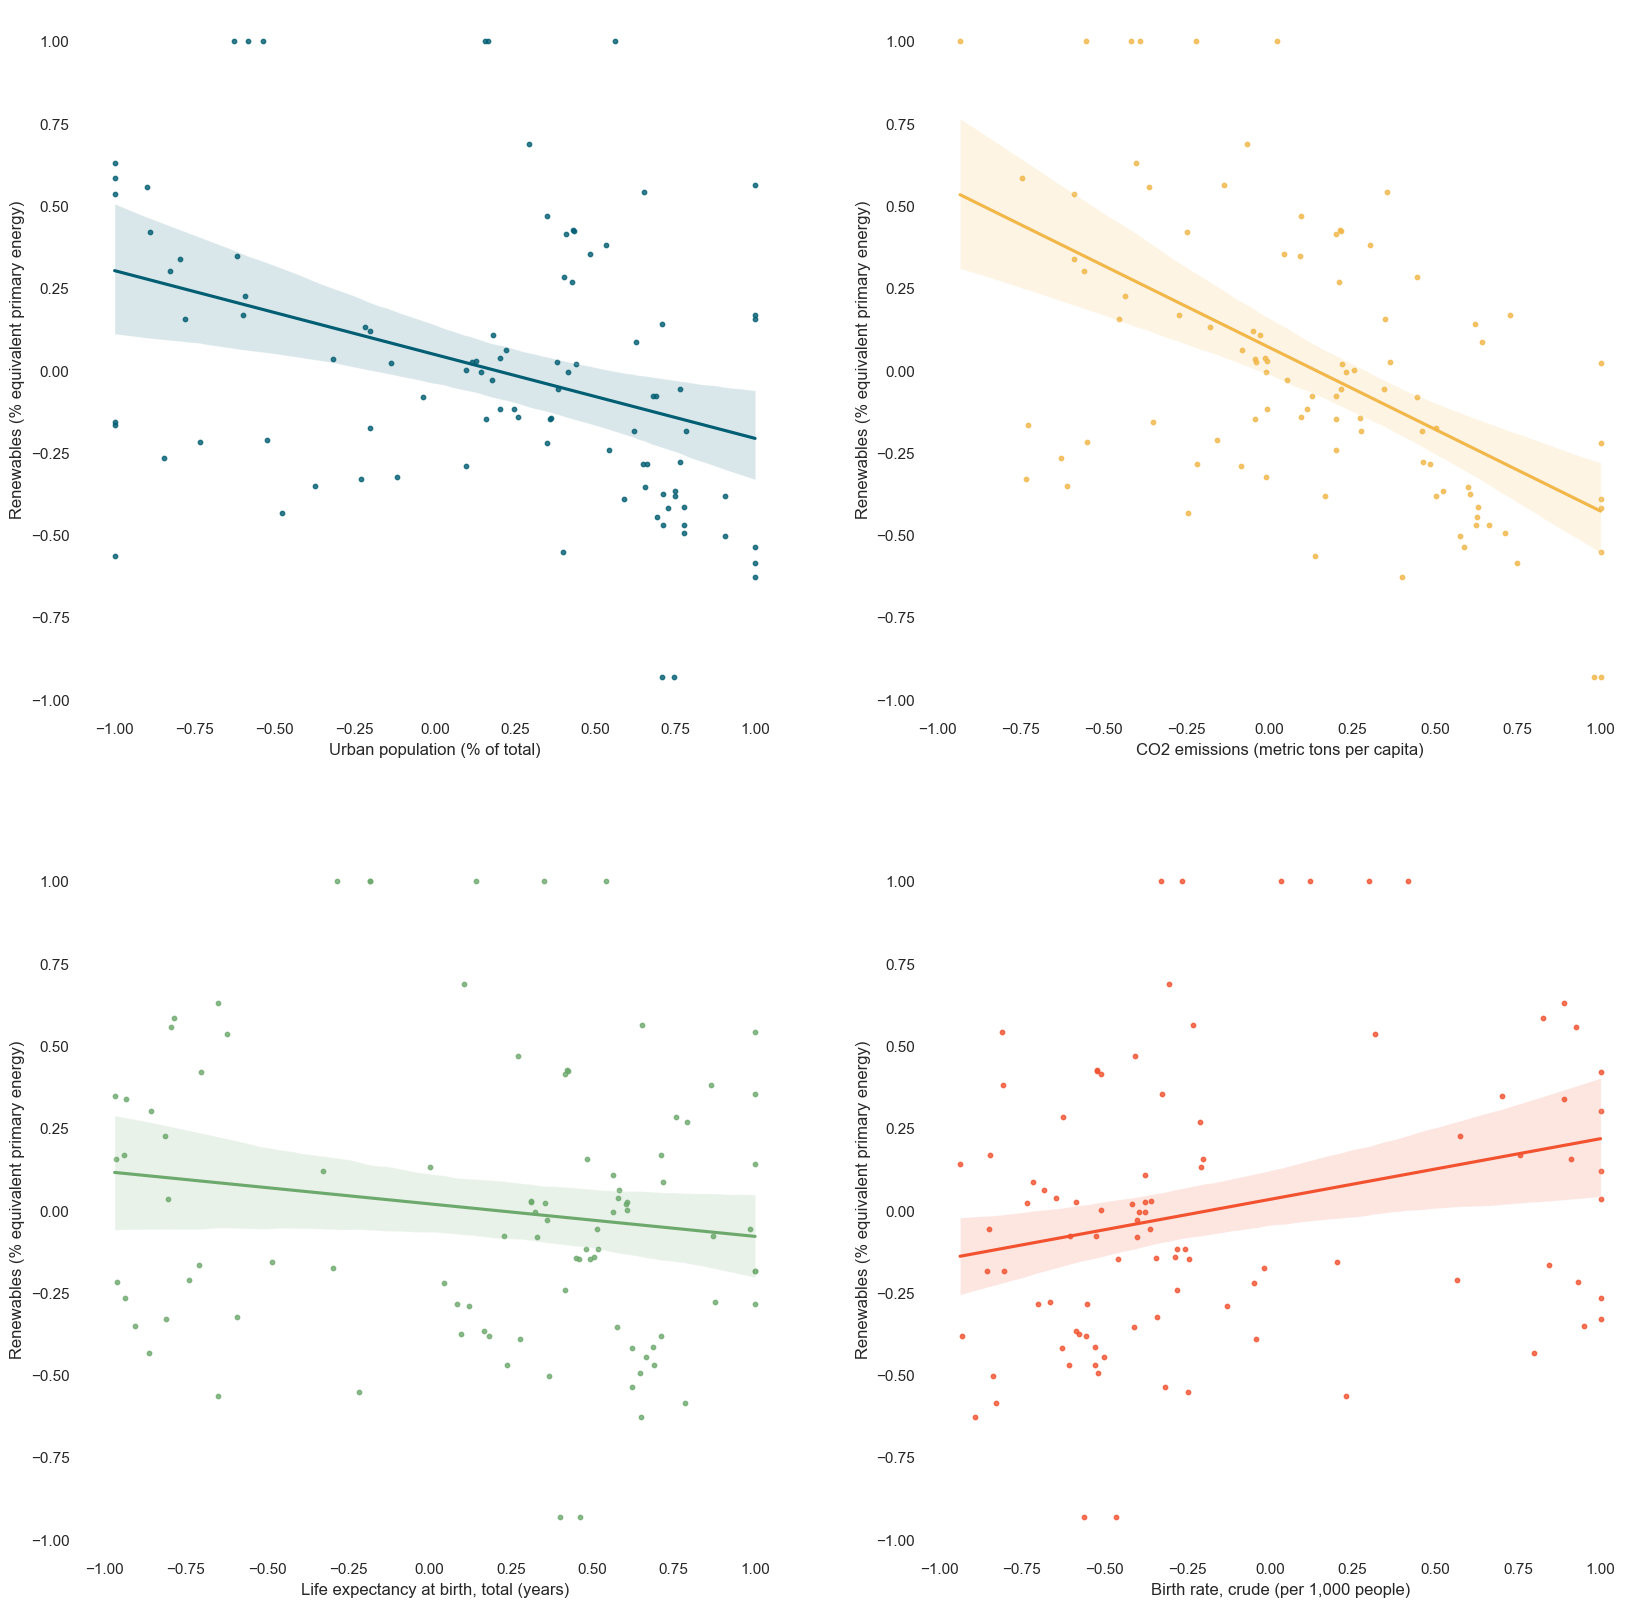

In [255]:
fig, ax =plt.subplots(2,2, figsize=(20,20))
Urban_pop_reg = sns.regplot(color=custom_palette[0],data=all_countries, x='Urban population (% of total)', y='Renewables (% equivalent primary energy)',
                            ax=ax[0,0], scatter_kws={'s':10})
Life_expe_birth_reg = sns.regplot(color=custom_palette[2],data=all_countries, x='Life expectancy at birth, total (years)', y='Renewables (% equivalent primary energy)',
                            ax=ax[1,0], scatter_kws={'s':10})
co2_emissions_reg = sns.regplot(color=custom_palette[3],data=all_countries, x='CO2 emissions (metric tons per capita)', y='Renewables (% equivalent primary energy)',
                            ax=ax[0,1], scatter_kws={'s':10})
birth_rate_reg = sns.regplot(color=custom_palette[4],data=all_countries, x='Birth rate, crude (per 1,000 people)', y='Renewables (% equivalent primary energy)',
                            ax=ax[1,1], scatter_kws={'s':10})




To finish this project off, lets get the correlation coeffiencients and p values

In [266]:
from scipy import stats

pearson_coef, p_value = stats.pearsonr(all_countries['Urban population (% of total)'], all_countries['Renewables (% equivalent primary energy)'])
print('Urban population (% of total) vs Renewables (% equivalent primary energy): ','\n Coefficient: ', pearson_coef, '| p-value: ', p_value)

pearson_coef, p_value = stats.pearsonr(all_countries['Life expectancy at birth, total (years)'], all_countries['Renewables (% equivalent primary energy)'])
print('Life expectancy at birth, total (years) vs Renewables (% equivalent primary energy): ','\n Coefficient: ', pearson_coef, '| p-value: ', p_value)

pearson_coef, p_value = stats.pearsonr(all_countries['CO2 emissions (metric tons per capita)'], all_countries['Renewables (% equivalent primary energy)'])
print('CO2 emissions (metric tons per capita) vs Renewables (% equivalent primary energy): ','\n Coefficient: ', pearson_coef, '| p-value: ', p_value)

pearson_coef, p_value = stats.pearsonr(all_countries['Birth rate, crude (per 1,000 people)'], all_countries['Renewables (% equivalent primary energy)'])
print('Birth rate, crude (per 1,000 people) vs Renewables (% equivalent primary energy): ','\n Coefficient: ', pearson_coef, '| p-value: ', p_value)


Urban population (% of total) vs Renewables (% equivalent primary energy):  
 Coefficient:  -0.3578360918776594 | p-value:  0.00034435225403987835
Life expectancy at birth, total (years) vs Renewables (% equivalent primary energy):  
 Coefficient:  -0.14006768934558048 | p-value:  0.173475673369172
CO2 emissions (metric tons per capita) vs Renewables (% equivalent primary energy):  
 Coefficient:  -0.5374393525697805 | p-value:  1.6436579252463773e-08
Birth rate, crude (per 1,000 people) vs Renewables (% equivalent primary energy):  
 Coefficient:  0.252963784782323 | p-value:  0.012895346659594985


## Findings

- 